[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/cca-cce/osm-cca/blob/main/jnb/simm71/cv3_lecture.ipynb)

# Research question

**Introduction**  
How can image embeddings generated from video frames of sustainability communication campaigns differentiate between authentic sustainability communication and greenwashing? By comparing frames from organizations like Preem (involved in fossil fuel industries) and Vattenfall (focused on renewable energy), this study aims to uncover patterns in visual communication that align with inauthentic or authentic sustainability messaging.

**Research Question**  
How can video frames from sustainability communication be analyzed using image embeddings to measure the degree of greenwashing compared to authentic sustainability communication?

**Proposed Investigation**  
Using the OpenAI CLIP model, this study will analyze the similarity between video frames and conceptual text descriptions such as "inauthentic greenwashing" and "authentic sustainability communication." This approach enables a semantic comparison between visual communication modalities and linguistic constructs of authenticity and greenwashing.

**Methodology**

1. **Image Embeddings**:
   - Extract image embeddings from video frames of sustainability communication campaigns using the CLIP model.
   - Compute cosine similarity between these embeddings and the embeddings of descriptive text strings ("inauthentic greenwashing" and "authentic sustainability communication").

2. **Frame-Level Analysis**:
   - For each video frame, calculate similarity scores with both descriptive text strings.
   - Categorize frames based on their relative similarity to these two semantic concepts.

3. **Aggregation**:
   - Compute aggregated similarity scores for entire videos to evaluate their overall alignment with either greenwashing or authentic communication narratives.
   - Compare aggregated scores between organizations to identify visual communication trends.

4. **Visualization**:
   - Create similarity heatmaps and timelines to illustrate fluctuations in communication styles across video frames.
   - Generate comparative visualizations to highlight differences between organizations.

**Expected Results**

- **Preem**: Frames may show higher similarity to "inauthentic greenwashing," emphasizing lush greenery, idyllic settings, and emotional cues designed to deflect attention from unsustainable practices.
- **Vattenfall**: Frames are expected to align more closely with "authentic sustainability communication," featuring renewable energy projects and factual representations of environmental initiatives.
- **Temporal Trends**: Videos with greater alignment to "inauthentic greenwashing" may exhibit inconsistent messaging, with frames oscillating between sustainability tropes and unrelated content, whereas authentic communication may show thematic coherence.

**Contributions**

This investigation will:
- Offer a novel application of the CLIP model for evaluating corporate sustainability messaging.
- Highlight the potential of image embeddings to quantitatively assess greenwashing levels.
- Provide actionable insights for stakeholders seeking to differentiate authentic sustainability communication from greenwashing practices.

By leveraging semantic embeddings and similarity analysis, this study aims to advance methods for scrutinizing corporate sustainability claims and ensuring accountability in public communication.

# Content vectorization

In [1]:
!python -m spacy download en_core_web_md > /dev/null 2>&1


In [2]:
import spacy

# Load a spaCy model with word vectors (e.g., en_core_web_md or en_core_web_lg)
nlp = spacy.load("en_core_web_md")

print(nlp("cat").vector)

[ 3.7032e+00  4.1982e+00 -5.0002e+00 -1.1322e+01  3.1702e-02 -1.0255e+00
 -3.0870e+00 -3.7327e+00  5.3875e-01  3.5679e+00  6.9276e+00  1.5793e+00
  5.1188e-01  3.1868e+00  6.1534e+00 -4.8941e+00 -2.9959e-01 -3.6276e+00
  2.3825e+00 -1.4402e+00 -4.7577e+00  4.3607e+00 -4.9814e+00 -3.6672e+00
 -1.8052e+00 -2.1888e+00 -4.2875e+00  5.5712e+00 -5.2875e+00 -1.8346e+00
 -2.2015e+00 -7.7091e-01 -4.8260e+00  1.2464e+00 -1.7945e+00 -8.1280e+00
  1.9994e+00  1.1413e+00  3.8032e+00 -2.8783e+00 -4.2136e-01 -4.4177e+00
  7.7456e+00  4.9535e+00  1.7402e+00  1.8275e-01  2.4218e+00 -3.1496e+00
 -3.8057e-02 -2.9818e+00  8.3396e-01  1.1531e+01  3.5684e+00  2.5970e+00
 -2.8438e+00  3.2755e+00  4.5674e+00  3.2219e+00  3.4206e+00  1.1200e-01
  1.0303e-01 -5.8396e+00  4.6370e-01  2.7750e+00 -5.3713e+00 -5.0247e+00
 -2.0212e+00  5.8772e-01  1.1569e+00  1.3224e+00  4.3994e+00  2.0444e+00
  2.1343e+00 -1.9023e+00  2.1469e+00 -2.9085e+00  4.8429e-01 -3.3544e-01
  1.4484e+00 -1.5770e+00 -1.1307e+00  2.8320e+00  6

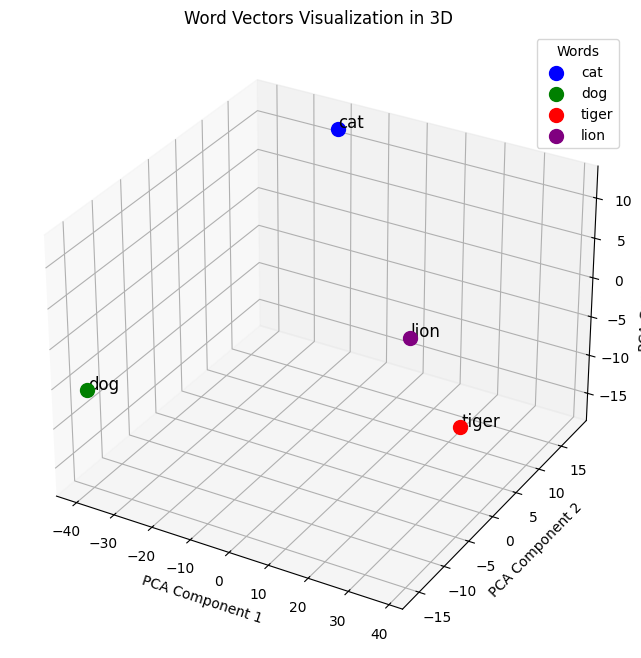

In [3]:
import spacy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Load the SpaCy medium model
nlp = spacy.load("en_core_web_md")

# Define words and generate their vectors
words = ["cat", "dog", "tiger", "lion"]
vectors = np.array([nlp(word).vector for word in words])

# Reduce dimensionality to 3D using PCA
pca = PCA(n_components=3)
reduced_vectors = pca.fit_transform(vectors)

# Plot the word vectors in 3D space
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
colors = ["blue", "green", "red", "purple"]

for i, word in enumerate(words):
    x, y, z = reduced_vectors[i]
    ax.scatter(x, y, z, color=colors[i], s=100, label=word)
    ax.text(x + 0.1, y + 0.1, z + 0.1, word, fontsize=12)

# Configure the 3D plot
ax.set_title("Word Vectors Visualization in 3D")
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.legend(title="Words")

# Save the figure as a PNG file
plt.savefig("space_visualization.png", format="png", dpi=300, bbox_inches="tight")

plt.show()


# Cosine similarity

In [4]:
import spacy

# Load a spaCy model with word vectors (e.g., en_core_web_md or en_core_web_lg)
nlp = spacy.load("en_core_web_md")

# Define two words
word1 = nlp("cat")
word2 = nlp("tiger")

# Compare word vectors using similarity
similarity = word1.similarity(word2)

print(f"Similarity between '{word1.text}' and '{word2.text}': {similarity:.4f}")


Similarity between 'cat' and 'tiger': 0.5671


In [5]:
import spacy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load spaCy's English medium model
nlp = spacy.load("en_core_web_md")

# Generate word vectors
word1 = nlp("cat").vector
word2 = nlp("tiger").vector

# Calculate cosine similarity
def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

similarity = cosine_similarity(word1, word2)
print(f"Cosine Similarity between word1 and word2: {similarity:.4f}")



Cosine Similarity between word1 and word2: 0.5671


Cosine similarity measures the cosine of the angle between two multi-dimensional vectors in a vector space. It is calculated as:

$$
\text{Cosine Similarity} = \frac{\mathbf{A} \cdot \mathbf{B}}{|\mathbf{A}| |\mathbf{B}|}
$$

Where:

- $\mathbf{A} \cdot \mathbf{B}$ is the dot product of vectors $\mathbf{A}$ and $\mathbf{B}$.
- $|\mathbf{A}|$ and $|\mathbf{B}|$ are the magnitudes (or norms) of vectors $\mathbf{A}$ and $\mathbf{B}$.

Cosine similarity can handle multi-dimensional vectors of any size. It results in a value between \(-1\) and \(1\):
- \(1\) indicates perfect similarity (the vectors point in the same direction).
- \(0\) indicates no similarity (the vectors are orthogonal).
- \(-1\) indicates perfect dissimilarity (the vectors point in opposite directions).

**Advantages**
- Cosine similarity is scale-invariant, meaning it measures the orientation of vectors rather than their magnitude.
- It works well for high-dimensional spaces, such as text embeddings or feature vectors.

**Applications**
- Document similarity in Natural Language Processing (e.g., comparing TF-IDF vectors).
- Comparing image feature vectors in Computer Vision.
- Clustering and similarity search in multi-dimensional datasets.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


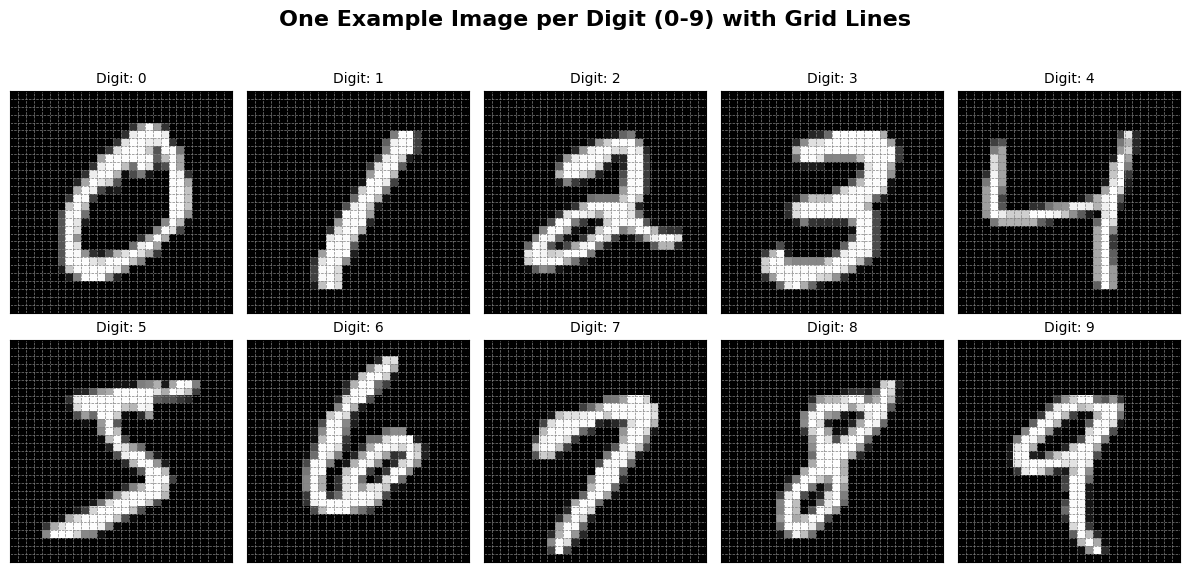

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist

# Step 1: Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Combine training and test sets
images = np.concatenate([train_images, test_images])
labels = np.concatenate([train_labels, test_labels])

# Step 2: Select one image per digit (0 through 9)
selected_images = []
for digit in range(10):
    digit_indices = np.where(labels == digit)[0]
    selected_images.append(images[digit_indices[0]])  # Pick the first occurrence of each digit

# Step 3: Plot the selected images in a 2-row by 5-column grid with grid lines
fig, axes = plt.subplots(2, 5, figsize=(12, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(selected_images[i], cmap='gray')
    ax.set_title(f"Digit: {i}", fontsize=10)
    ax.axis('on')
    ax.set_xticks(np.arange(-0.5, 28, 1))  # Add grid ticks
    ax.set_yticks(np.arange(-0.5, 28, 1))
    ax.grid(visible=True, color='gray', linestyle='--', linewidth=0.5)
    ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

# Add a suptitle
fig.suptitle("One Example Image per Digit (0-9) with Grid Lines", fontsize=16, weight='bold')

# Adjust spacing between subplots
fig.tight_layout()
fig.subplots_adjust(top=0.88)  # Leave space for the suptitle

plt.show()


In [7]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import plotly.express as px
from tensorflow.keras.datasets import mnist

# Step 1: Load the MNIST dataset using TensorFlow
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Combine training and test sets
images = np.concatenate([train_images, test_images])
labels = np.concatenate([train_labels, test_labels])

# Flatten the images into vectors
images_flattened = images.reshape(images.shape[0], -1)

# Step 2: Draw a balanced sample of 100 images
sample_size_per_class = 10  # 10 samples for each of the 10 digits
balanced_sample_indices = []
for digit in range(10):
    digit_indices = np.where(labels == digit)[0]
    balanced_sample_indices.extend(np.random.choice(digit_indices, sample_size_per_class, replace=False))

balanced_sample_indices = np.array(balanced_sample_indices)
balanced_images = images_flattened[balanced_sample_indices]
balanced_labels = labels[balanced_sample_indices]

# Step 3: Prepare the DataFrame
data = {
    "Label": balanced_labels,
    "Vector": balanced_images.tolist()
}
df = pd.DataFrame(data)

# Step 4: Perform t-SNE to reduce dimensions to 3D
tsne = TSNE(n_components=3, random_state=42)
tsne_results = tsne.fit_transform(balanced_images)

# Step 5: Add t-SNE results to the DataFrame
df["TSNE-1"] = tsne_results[:, 0]
df["TSNE-2"] = tsne_results[:, 1]
df["TSNE-3"] = tsne_results[:, 2]

# Step 6: Plot the t-SNE results in 3D using Plotly
fig = px.scatter_3d(
    df,
    x="TSNE-1",
    y="TSNE-2",
    z="TSNE-3",
    color=df["Label"].astype(str),  # Convert labels to strings for categorical coloring
    title="t-SNE Visualization of MNIST Digits",
    labels={"color": "Digit Label"},
    hover_name="Label",
    template="plotly_dark"
)

# Step 7: Display the plot in the notebook
fig.show()

# Step 8: Save the HTML plot to a file
output_file = "mnist_tsne_plot.html"
fig.write_html(output_file)

print(f"t-SNE 3D plot saved to {output_file}")


t-SNE 3D plot saved to mnist_tsne_plot.html


In [8]:
df.head()

,Label,Vector,TSNE-1,TSNE-2,TSNE-3
0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",65.525826,-82.467476,69.878235
1,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4.270545,-102.603806,-65.574074
2,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-35.967003,91.614319,-20.300848
3,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",76.249313,-24.698742,-45.811981
4,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-117.173462,37.795834,-47.154469


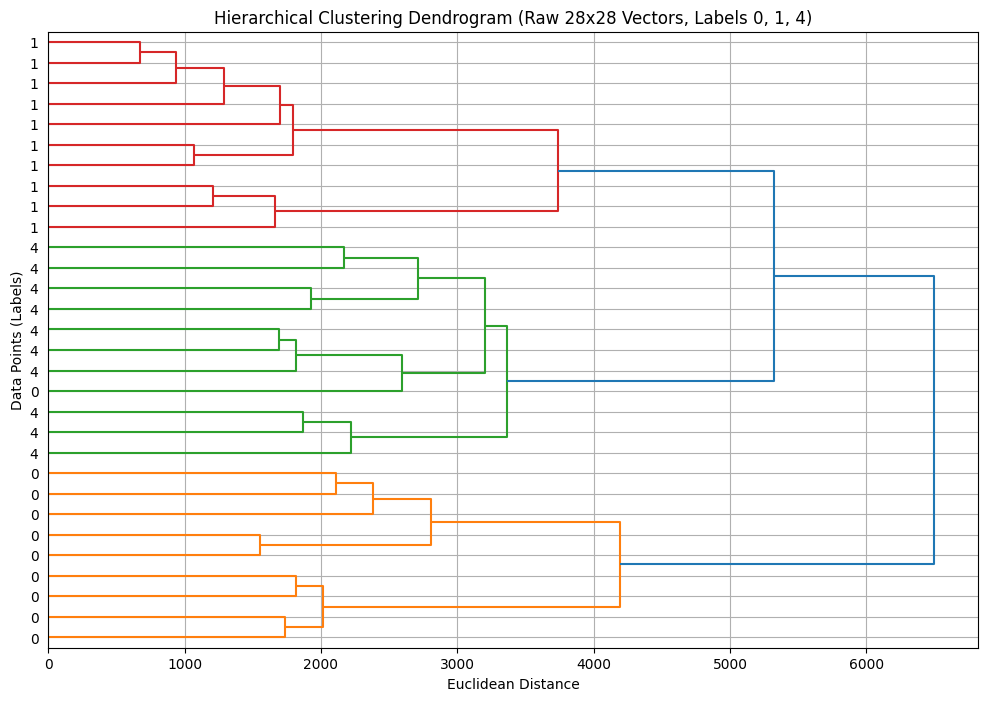

In [9]:
import pandas as pd
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Filter the DataFrame for specific labels
filtered_df = df[df["Label"].isin([0, 1, 4])]

# Step 2: Shuffle the filtered DataFrame using a random seed
filtered_df = filtered_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 3: Extract the raw vector values for clustering
# Convert the "Vector" column (list-like) into a 2D NumPy array
raw_vectors = np.array(filtered_df["Vector"].tolist())

# Step 4: Perform hierarchical clustering
linked = sch.linkage(raw_vectors, method='ward')

# Step 5: Use the 'Label' column as labels
labels = filtered_df["Label"].astype(str).values  # Convert labels to strings for compatibility

# Step 6: Plot the dendrogram horizontally
plt.figure(figsize=(12, 8))
dendrogram = sch.dendrogram(
    linked,
    labels=labels,   # Use the shuffled 'Label' column as the labels
    orientation='right',  # Change orientation to horizontal
    leaf_rotation=0,      # Keep leaf labels vertical for better readability
    leaf_font_size=10
)
plt.title("Hierarchical Clustering Dendrogram (Raw 28x28 Vectors, Labels 0, 1, 4)")
plt.ylabel("Data Points (Labels)")  # Updated ylabel to reflect label usage
plt.xlabel("Euclidean Distance")
plt.grid(True)

# Save the figure as a PNG file
plt.savefig("cluster_visualization.png", format="png", dpi=300, bbox_inches="tight")

plt.show()


# Color histogram similarity

# Structural similarity

In [10]:
# https://drive.google.com/file/d/1qzRGYLpEfdC3Sukag_fszX_jT-Ylpb4W/view?usp=sharing
!rm -rf *.zip cv-* 2>/dev/null
!gdown https://drive.google.com/uc?id=1qzRGYLpEfdC3Sukag_fszX_jT-Ylpb4W
!unzip -q *.zip 2>/dev/null

Downloading...
From (original): https://drive.google.com/uc?id=1qzRGYLpEfdC3Sukag_fszX_jT-Ylpb4W
From (redirected): https://drive.google.com/uc?id=1qzRGYLpEfdC3Sukag_fszX_jT-Ylpb4W&confirm=t&uuid=3f6855bf-1efd-4121-870b-2e87dcea5653
To: /content/drive-download-20250106T125430Z-001.zip
100% 114M/114M [00:01<00:00, 94.3MB/s]


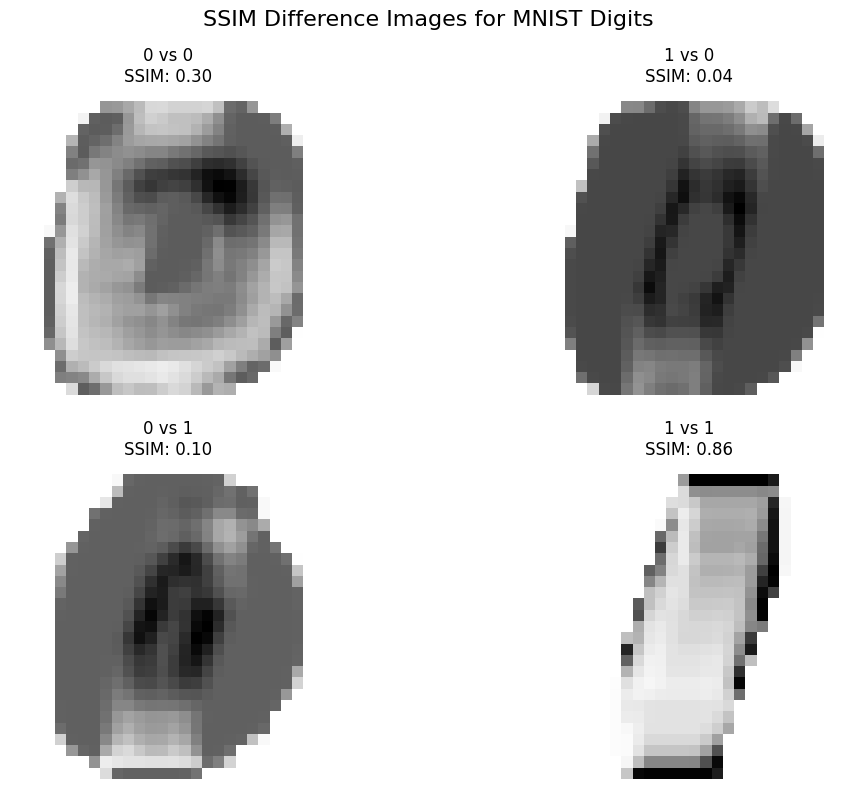

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from skimage.metrics import structural_similarity as ssim

# Step 1: Load the MNIST dataset
(_, _), (test_images, test_labels) = mnist.load_data()

# Step 2: Get the first and second instances of digits 0 and 1
image_0_1 = test_images[test_labels == 0][0]  # First instance of 0
image_0_2 = test_images[test_labels == 0][1]  # Second instance of 0
image_1_1 = test_images[test_labels == 1][0]  # First instance of 1
image_1_2 = test_images[test_labels == 1][1]  # Second instance of 1

# Step 3: Compute SSIM and difference images
def compute_ssim(image1, image2):
    score, diff = ssim(image1, image2, full=True)
    return score, diff

# SSIM comparisons
ssim_0_0, diff_0_0 = compute_ssim(image_0_1, image_0_2)  # Top-left: 0 vs 0
ssim_1_0, diff_1_0 = compute_ssim(image_1_1, image_0_2)  # Top-right: 1 vs 0
ssim_0_1, diff_0_1 = compute_ssim(image_0_1, image_1_2)  # Bottom-left: 0 vs 1
ssim_1_1, diff_1_1 = compute_ssim(image_1_1, image_1_2)  # Bottom-right: 1 vs 1

# Step 4: Visualize the results with a 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("SSIM Difference Images for MNIST Digits", fontsize=16)

# Top row
axes[0, 0].imshow(diff_0_0, cmap='gray')
axes[0, 0].set_title(f"0 vs 0\nSSIM: {ssim_0_0:.2f}")
axes[0, 0].axis('off')

axes[0, 1].imshow(diff_1_0, cmap='gray')
axes[0, 1].set_title(f"1 vs 0\nSSIM: {ssim_1_0:.2f}")
axes[0, 1].axis('off')

# Bottom row
axes[1, 0].imshow(diff_0_1, cmap='gray')
axes[1, 0].set_title(f"0 vs 1\nSSIM: {ssim_0_1:.2f}")
axes[1, 0].axis('off')

axes[1, 1].imshow(diff_1_1, cmap='gray')
axes[1, 1].set_title(f"1 vs 1\nSSIM: {ssim_1_1:.2f}")
axes[1, 1].axis('off')

# Configure layout and display
plt.tight_layout()
plt.subplots_adjust(top=0.88)

# Save the figure as a PNG file
plt.savefig("ssim_visualization.png", format="png", dpi=300, bbox_inches="tight")

plt.show()


**Explanation of SSIM:**

- **Structural Similarity Index Measure (SSIM)**: A perceptual metric that quantifies the similarity between two images by comparing their luminance, contrast, and structure. It is designed to mimic human visual perception.
- **Values**:
  - SSIM ranges from -1 to 1.
  - A value of **1** indicates identical images.
  - A value closer to **0** indicates dissimilarity.

**Key Steps in SSIM:**

1. **Luminance**: Compares average brightness of the two images.
2. **Contrast**: Measures the variance and contrast of the images.
3. **Structure**: Captures patterns or textures in the images.

   Time (s)      SSIM
0      0.04  0.888282
1      0.08  0.870232
2      0.12  0.845028
3      0.16  0.823856
4      0.20  0.818252


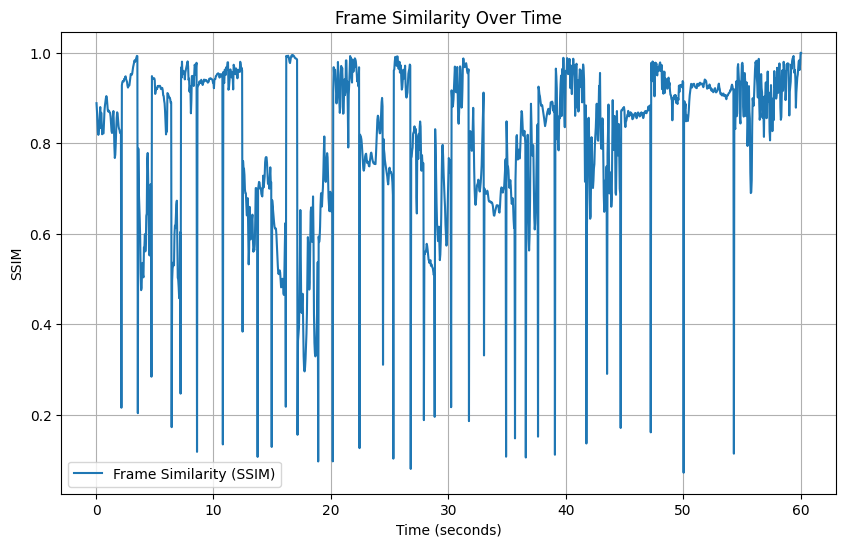

In [12]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.metrics import structural_similarity as compare_ssim

# Path to the video
video_path = "/content/cv-org1-preem/oYgrxXZTAQg.webm"

# Open the video file
cap = cv2.VideoCapture(video_path)

# Get video frame rate to convert frame index to seconds
fps = cap.get(cv2.CAP_PROP_FPS)

# Initialize variables
frame_index = 0
previous_frame = None
similarity_scores = []

while True:
    ret, current_frame = cap.read()
    if not ret:
        break  # End of video

    # Downsample frame to width 256 pixels while maintaining aspect ratio
    height, width = current_frame.shape[:2]
    aspect_ratio = height / width
    resized_frame = cv2.resize(current_frame, (256, int(256 * aspect_ratio)))

    # Convert frame to grayscale
    gray_frame = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2GRAY)

    if previous_frame is not None:
        # Compute SSIM between the previous and current frame
        ssim, _ = compare_ssim(previous_frame, gray_frame, full=True)

        # Convert frame index to time in seconds
        time_in_seconds = frame_index / fps

        # Record time and SSIM
        similarity_scores.append({"Time (s)": time_in_seconds, "SSIM": ssim})

    # Update the previous frame and frame index
    previous_frame = gray_frame
    frame_index += 1

# Release video capture
cap.release()

# Convert similarity scores to a pandas dataframe
df = pd.DataFrame(similarity_scores)

# Display the dataframe
print(df.head())

# Visualize SSIM changes as a line graph using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Time (s)", y="SSIM", label="Frame Similarity (SSIM)")
plt.xlabel("Time (seconds)")
plt.ylabel("SSIM")
plt.title("Frame Similarity Over Time")
plt.legend()
plt.grid()
plt.show()


In [13]:
# Filter the dataframe to view the 10 lowest SSIM values with corresponding time, ordered by time
lowest_ssim = df.nsmallest(10, "SSIM").sort_values(by="Time (s)")
print("10 Lowest SSIM Values (Ordered by Time):")
print(lowest_ssim)


10 Lowest SSIM Values (Ordered by Time):
      Time (s)      SSIM
343      13.76  0.106430
472      18.92  0.096352
503      20.16  0.096582
632      25.32  0.102594
669      26.80  0.079876
872      34.92  0.106908
914      36.60  0.105115
976      39.08  0.111234
1250     50.04  0.071484
1357     54.32  0.113604


# Multimodal similarity

In [14]:
!pip install -q transformers torch pillow

In [15]:
import os
import pandas as pd
import torch
from PIL import Image
from transformers import CLIPProcessor, CLIPModel

# Initialize the CLIP model and processor
model_name = "openai/clip-vit-base-patch32"
model = CLIPModel.from_pretrained(model_name)
processor = CLIPProcessor.from_pretrained(model_name)

# Base directories
directories = ["cv-org1-preem", "cv-org2-vattenfall"]

# Dataframe to store results
data = []

# Iterate over the directories
for directory in directories:
    for file in os.listdir(directory):
        # Check if the file is a valid image
        if file.startswith("frame_") and file.endswith(".png"):
            file_path = os.path.join(directory, file)

            try:
                # Load the image
                image = Image.open(file_path).convert("RGB")

                # Preprocess the image
                inputs = processor(images=image, return_tensors="pt", padding=True)

                # Extract image embeddings
                with torch.no_grad():
                    embeddings = model.get_image_features(**inputs).squeeze(0).tolist()

                # Append to the data
                data.append({
                    "Directory": directory,
                    "File_Path": file_path,
                    "Embeddings": embeddings
                })
            except Exception as e:
                print(f"Error processing {file_path}: {e}")

# Create a dataframe
df = pd.DataFrame(data)

# Save the dataframe to disk
output_path = "image_embeddings.csv"
df.to_csv(output_path, index=False)
print(f"Embeddings saved to {output_path}")


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

Embeddings saved to image_embeddings.csv


In [16]:
df.head()

,Directory,File_Path,Embeddings
0,cv-org1-preem,cv-org1-preem/frame_oYgrxXZTAQg_0013.png,"[0.21355414390563965, 0.1845254749059677, -0.0..."
1,cv-org1-preem,cv-org1-preem/frame_oYgrxXZTAQg_0007.png,"[0.007920336909592152, 0.12145688384771347, -0..."
2,cv-org1-preem,cv-org1-preem/frame_oYgrxXZTAQg_0014.png,"[-0.3653581142425537, 0.05016366019845009, -0...."
3,cv-org1-preem,cv-org1-preem/frame_oYgrxXZTAQg_0009.png,"[0.1560061126947403, -0.0489334873855114, -0.0..."
4,cv-org1-preem,cv-org1-preem/frame_oYgrxXZTAQg_0004.png,"[0.2963852286338806, -0.1729268580675125, 0.11..."


In [17]:
# Ensure the dataframe is loaded or exists
if not df.empty:
    # Access the first row's embeddings
    first_embedding = df.loc[0, "Embeddings"]

    # Print the length of the embedding
    print(f"Length of the first image embedding: {len(first_embedding)}")
else:
    print("The dataframe is empty. No embeddings to process.")


Length of the first image embedding: 512


In [18]:
from transformers import CLIPTokenizer, CLIPTextModel
import torch

# Initialize the CLIP tokenizer and text model
model_name = "openai/clip-vit-base-patch32"
tokenizer = CLIPTokenizer.from_pretrained(model_name)
text_model = CLIPTextModel.from_pretrained(model_name)

# Ensure the dataframe is not empty
if not df.empty:
    # Access the first row's embedding
    first_embedding = torch.tensor(df.loc[0, "Embeddings"]).unsqueeze(0)  # Convert to tensor and add batch dimension

    # Define a set of potential text captions
    captions = [
        "A beautiful scene of nature",
        "A cityscape with tall buildings",
        "A close-up of a person",
        "An animal in the wild",
        "A group of people",
        "An artistic painting",
        "A landscape with mountains",
        "A futuristic technology device",
    ]

    # Encode the text captions
    text_inputs = tokenizer(captions, padding=True, return_tensors="pt")
    text_features = text_model(**text_inputs).last_hidden_state.mean(dim=1)

    # Normalize the embeddings
    first_embedding = first_embedding / first_embedding.norm(dim=-1, keepdim=True)
    text_features = text_features / text_features.norm(dim=-1, keepdim=True)

    # Compute cosine similarity between the image embedding and text features
    similarities = torch.matmul(first_embedding, text_features.T)

    # Find the caption with the highest similarity
    best_caption_idx = similarities.argmax().item()
    best_caption = captions[best_caption_idx]

    # Print the generated caption
    print(f"Generated caption for the first image: {best_caption}")
else:
    print("The dataframe is empty. No embeddings to process.")


Generated caption for the first image: An artistic painting


# Results and visualizations

In [19]:
from transformers import CLIPTokenizer, CLIPTextModel
import torch

# Initialize the CLIP tokenizer and text model
model_name = "openai/clip-vit-base-patch32"
tokenizer = CLIPTokenizer.from_pretrained(model_name)
text_model = CLIPTextModel.from_pretrained(model_name)

# Define a set of potential text captions
captions = [
    "A beautiful scene of nature",
    "A cityscape with tall buildings",
    "A close-up of a person",
    "An animal in the wild",
    "A group of people",
    "An artistic painting",
    "A landscape with mountains",
    "A futuristic technology device",
]

# Function to generate the best caption for an embedding
def generate_caption_and_score(embedding):
    # Convert the embedding to a tensor and normalize it
    embedding_tensor = torch.tensor(embedding).unsqueeze(0)  # Add batch dimension
    embedding_tensor = embedding_tensor / embedding_tensor.norm(dim=-1, keepdim=True)

    # Tokenize and encode the text captions
    text_inputs = tokenizer(captions, padding=True, return_tensors="pt")
    text_features = text_model(**text_inputs).last_hidden_state.mean(dim=1)
    text_features = text_features / text_features.norm(dim=-1, keepdim=True)

    # Compute cosine similarity between the image embedding and text features
    similarities = torch.matmul(embedding_tensor, text_features.T)

    # Find the caption with the highest similarity
    best_caption_idx = similarities.argmax().item()
    best_caption = captions[best_caption_idx]
    best_similarity_score = similarities[0, best_caption_idx].item()

    return best_caption, best_similarity_score

# Iterate over all images in the dataframe and generate captions and scores
if not df.empty:
    captions_list = []  # List to store generated captions
    scores_list = []  # List to store similarity scores
    for idx, row in df.iterrows():
        embedding = row["Embeddings"]  # Extract the embedding
        caption, score = generate_caption_and_score(embedding)
        captions_list.append(caption)
        scores_list.append(score)

    # Add the generated captions and scores to the dataframe
    df["Generated_Caption"] = captions_list
    df["Similarity_Score"] = scores_list

    # Save the updated dataframe to disk
    output_path = "image_embeddings_with_captions_and_scores.csv"
    df.to_csv(output_path, index=False)
    print(f"Generated captions and similarity scores saved to {output_path}")
else:
    print("The dataframe is empty. No embeddings to process.")


Generated captions and similarity scores saved to image_embeddings_with_captions_and_scores.csv


In [20]:
df.head()

,Directory,File_Path,Embeddings,Generated_Caption,Similarity_Score
0,cv-org1-preem,cv-org1-preem/frame_oYgrxXZTAQg_0013.png,"[0.21355414390563965, 0.1845254749059677, -0.0...",An artistic painting,0.050794
1,cv-org1-preem,cv-org1-preem/frame_oYgrxXZTAQg_0007.png,"[0.007920336909592152, 0.12145688384771347, -0...",An artistic painting,0.063314
2,cv-org1-preem,cv-org1-preem/frame_oYgrxXZTAQg_0014.png,"[-0.3653581142425537, 0.05016366019845009, -0....",A beautiful scene of nature,-0.004810
3,cv-org1-preem,cv-org1-preem/frame_oYgrxXZTAQg_0009.png,"[0.1560061126947403, -0.0489334873855114, -0.0...",A beautiful scene of nature,0.041071
4,cv-org1-preem,cv-org1-preem/frame_oYgrxXZTAQg_0004.png,"[0.2963852286338806, -0.1729268580675125, 0.11...",An animal in the wild,0.044981


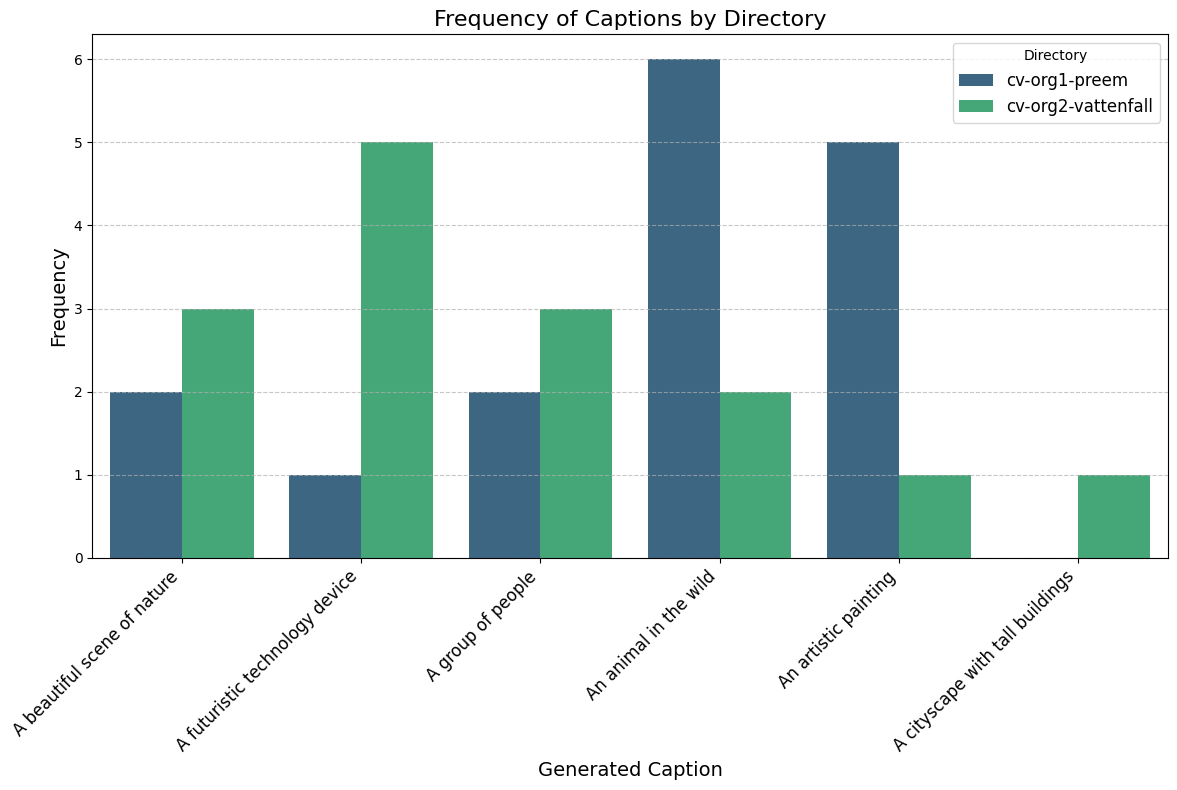

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataframe from the saved CSV file
df = pd.read_csv("image_embeddings_with_captions_and_scores.csv")

# Group the data by Directory and Generated_Caption to get the frequency
caption_frequency = df.groupby(["Directory", "Generated_Caption"]).size().reset_index(name="Frequency")

# Set up the figure for the grouped bar chart
plt.figure(figsize=(12, 8))

# Use seaborn to create the grouped bar chart
sns.barplot(
    data=caption_frequency,
    x="Generated_Caption",
    y="Frequency",
    hue="Directory",
    palette="viridis",
)

# Customize the plot
plt.title("Frequency of Captions by Directory", fontsize=16)
plt.xlabel("Generated Caption", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.legend(title="Directory", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


**Expected Results**

- **Preem**: Frames may show higher similarity to "inauthentic greenwashing," emphasizing lush greenery, idyllic settings, and emotional cues designed to deflect attention from unsustainable practices.
- **Vattenfall**: Frames are expected to align more closely with "authentic sustainability communication," featuring renewable energy projects and factual representations of environmental initiatives.
- **Temporal Trends**: Videos with greater alignment to "inauthentic greenwashing" may exhibit inconsistent messaging, with frames oscillating between sustainability tropes and unrelated content, whereas authentic communication may show thematic coherence.

**Contributions**

This investigation will:
- Offer a novel application of the CLIP model for evaluating corporate sustainability messaging.
- Highlight the potential of image embeddings to quantitatively assess greenwashing levels.
- Provide actionable insights for stakeholders seeking to differentiate authentic sustainability communication from greenwashing practices.

By leveraging semantic embeddings and similarity analysis, this study aims to advance methods for scrutinizing corporate sustainability claims and ensuring accountability in public communication.